<a href="https://colab.research.google.com/github/night05fury/Heart-Disease-Analysis-using-R/blob/main/Heart_Disease_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [ ]:
data <- read.csv("heart.csv")
head(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
2,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
3,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
4,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
5,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
6,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


In [ ]:
tail(data)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>
1020,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1021,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1022,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1023,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1024,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1025,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
glimpse(data)


Rows: 1,025
Columns: 14
$ age      <int> 52, 53, 70, 61, 62, 58, 58, 55, 46, 54, 71, 43, 34, 51, 52, 3…
$ sex      <int> 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1…
$ cp       <int> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 2, 0, 1, 2, 2…
$ trestbps <int> 125, 140, 145, 148, 138, 100, 114, 160, 120, 122, 112, 132, 1…
$ chol     <int> 212, 203, 174, 203, 294, 248, 318, 289, 249, 286, 149, 341, 2…
$ fbs      <int> 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0…
$ restecg  <int> 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0…
$ thalach  <int> 168, 155, 125, 161, 106, 122, 140, 145, 144, 116, 125, 136, 1…
$ exang    <int> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0…
$ oldpeak  <dbl> 1.0, 3.1, 2.6, 0.0, 1.9, 1.0, 4.4, 0.8, 0.8, 3.2, 1.6, 3.0, 0…
$ slope    <int> 2, 0, 0, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1…
$ ca       <int> 2, 0, 0, 1, 3, 0, 3, 1, 0, 2, 0, 0, 0, 3, 0, 0, 1, 1, 0, 0, 0…
$ thal     <int>

In [ ]:
ncol(data)


[1] 14

In [ ]:
nrow(data)

[1] 1025

In [ ]:
colnames(data)

[1] "age"      "sex"      "cp"       "trestbps" "chol"     "fbs"     
 [7] "restecg"  "thalach"  "exang"    "oldpeak"  "slope"    "ca"      
[13] "thal"     "target"

In [ ]:
summary(data)

      age             sex               cp            trestbps    
 Min.   :29.00   Min.   :0.0000   Min.   :0.0000   Min.   : 94.0  
 1st Qu.:48.00   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:120.0  
 Median :56.00   Median :1.0000   Median :1.0000   Median :130.0  
 Mean   :54.43   Mean   :0.6956   Mean   :0.9424   Mean   :131.6  
 3rd Qu.:61.00   3rd Qu.:1.0000   3rd Qu.:2.0000   3rd Qu.:140.0  
 Max.   :77.00   Max.   :1.0000   Max.   :3.0000   Max.   :200.0  
      chol          fbs            restecg          thalach     
 Min.   :126   Min.   :0.0000   Min.   :0.0000   Min.   : 71.0  
 1st Qu.:211   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:132.0  
 Median :240   Median :0.0000   Median :1.0000   Median :152.0  
 Mean   :246   Mean   :0.1493   Mean   :0.5298   Mean   :149.1  
 3rd Qu.:275   3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:166.0  
 Max.   :564   Max.   :1.0000   Max.   :2.0000   Max.   :202.0  
     exang           oldpeak          slope             ca        
 Min.   :

In [ ]:
data2 <- data %>%
  mutate(sex = if_else(sex == 1, "MALE", "FEMALE"),
         fbs = if_else(fbs == 1, ">120", "<=120"),
         exang = if_else(exang == 1, "YES" ,"NO"),
         cp = if_else(cp == 1, "ATYPICAL ANGINA",
                      if_else(cp == 2, "NON-ANGINAL PAIN", "ASYMPTOMATIC")),
         restecg = if_else(restecg == 0, "NORMAL",
                           if_else(restecg == 1, "ABNORMALITY", "PROBABLE OR DEFINITE")),
         slope = as.factor(slope),
         ca = as.factor(ca),
         thal = as.factor(thal),
         target = if_else(target == 1, "YES", "NO")
         ) %>% 
  mutate_if(is.character, as.factor) %>% 
  dplyr::select(target, sex, fbs, exang, cp, restecg, slope, ca, thal, everything())

Warning message:
“Use of `data2$target` is discouraged. Use `target` instead.”
Warning message:
“Use of `data2$target` is discouraged. Use `target` instead.”


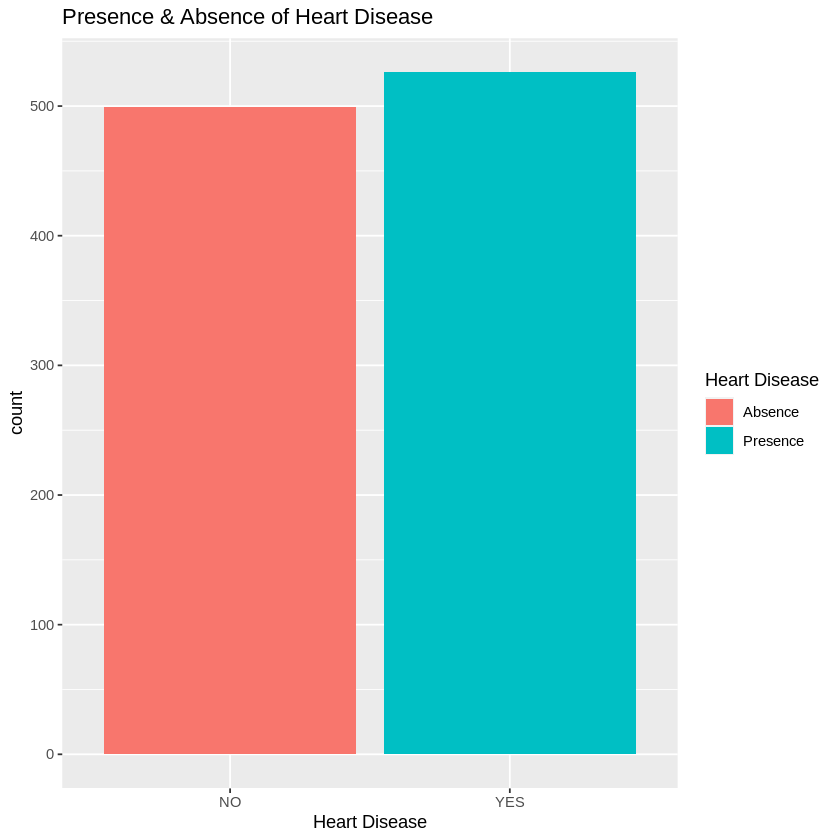

In [ ]:
# Bar Plot for target (heart disease)

ggplot(data2, aes(x=data2$target, fill=data2$target))+
   geom_bar()+
   xlab("Heart Disease")+
   ylab("count")+
   ggtitle("Presence & Absence of Heart Disease")+
   scale_fill_discrete(name= 'Heart Disease', labels =c("Absence", "Presence"))

In [ ]:
prop.table(table(data2$target))


       NO       YES 
0.4868293 0.5131707 

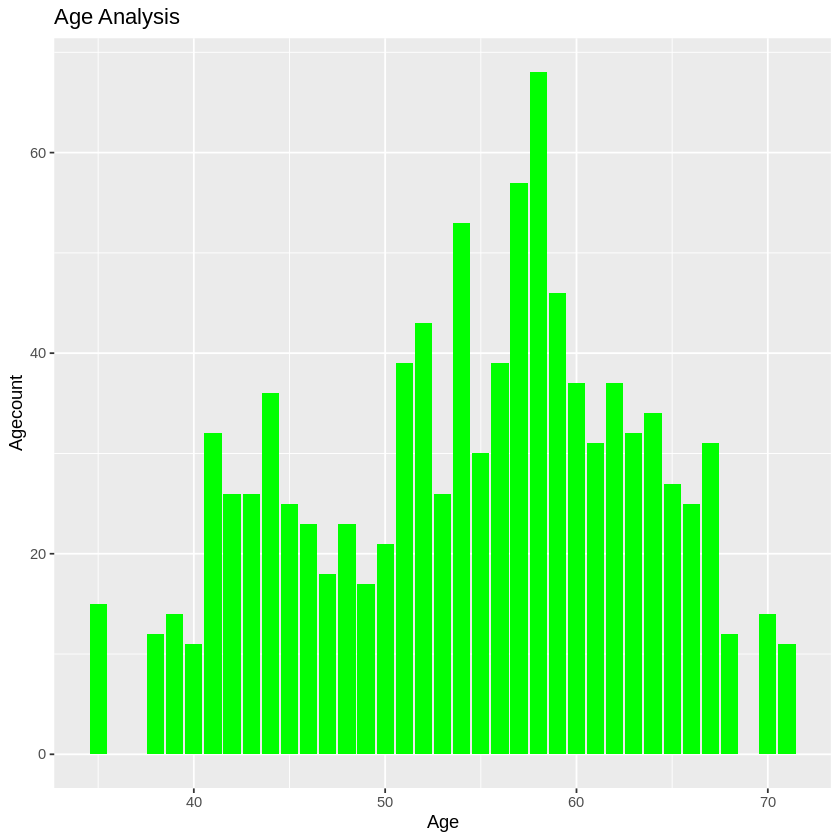

In [ ]:
# count the frequency of the values of age

data2 %>%
  group_by(age) %>%
  count() %>%
  filter(n>10) %>%
  ggplot()+
  geom_col(aes(age, n), fill = 'green')+
  ggtitle("Age Analysis")+
  xlab("Age")+
  ylab("Agecount")

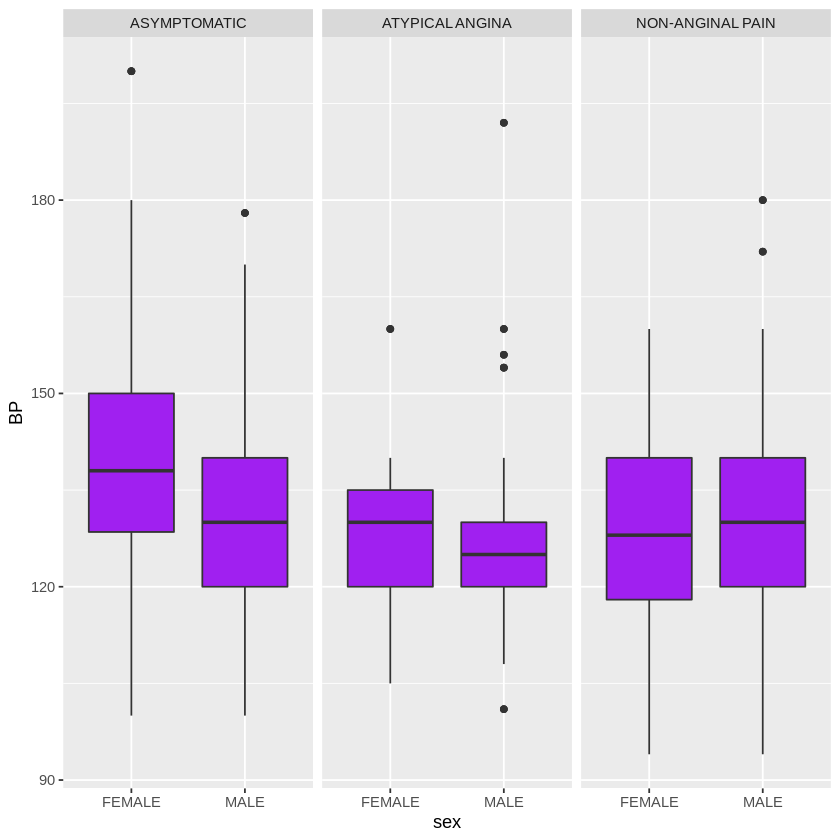

In [ ]:
# comapre blood pressure across the chest pain

data2 %>%
  ggplot(aes(x=sex, y=trestbps))+
  geom_boxplot(fill ='purple')+
  xlab('sex')+
  ylab('BP')+
  facet_grid(~cp)

Warning message:
“Continuous x aesthetic -- did you forget aes(group=...)?”


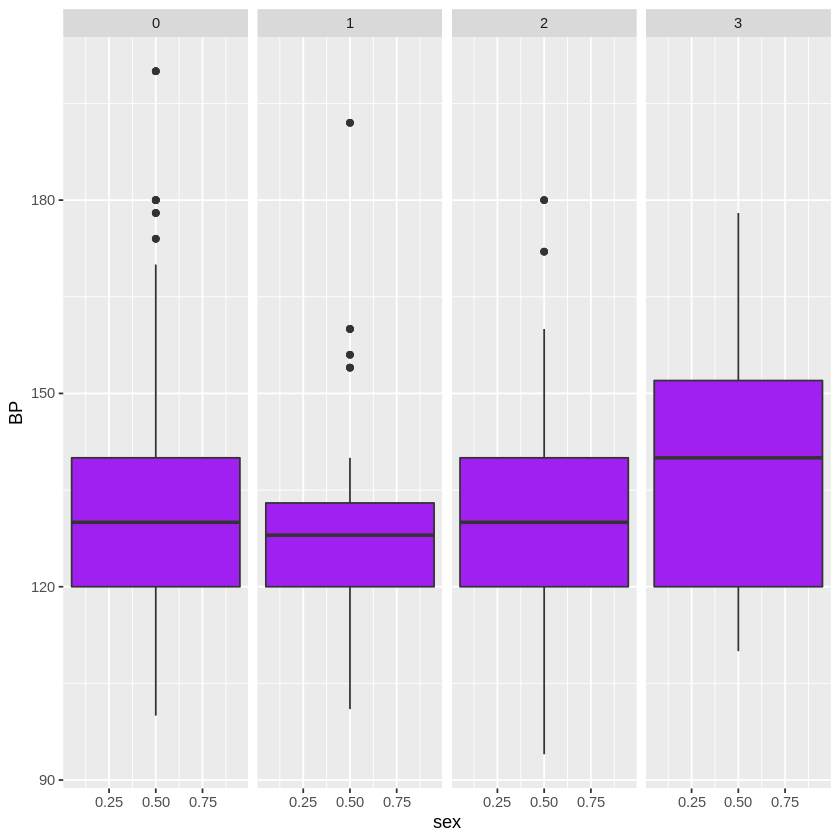

In [ ]:
data %>%
  ggplot(aes(x=sex, y=trestbps))+
  geom_boxplot(fill ='purple')+
  xlab('sex')+
  ylab('BP')+
  facet_grid(~cp)

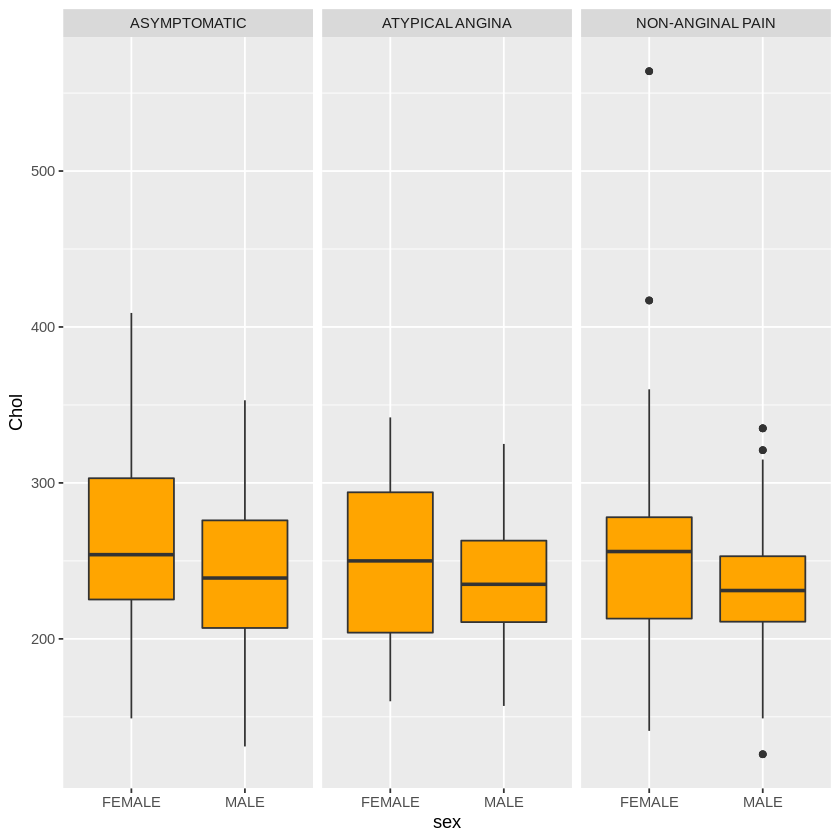

In [ ]:
data2 %>%
  ggplot(aes(x=sex, y=chol))+
  geom_boxplot(fill ='orange')+
  xlab('sex')+
  ylab('Chol')+
  facet_grid(~cp)